In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

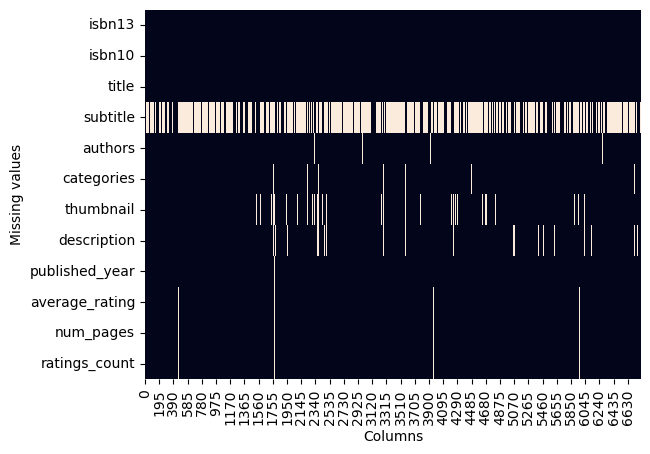

In [3]:
df = pd.read_csv('../books.csv')

ax = plt.axes()
sns.heatmap(df.isna().transpose(), cbar=False, ax=ax)
plt.xlabel('Columns')
plt.ylabel("Missing values")
plt.show()


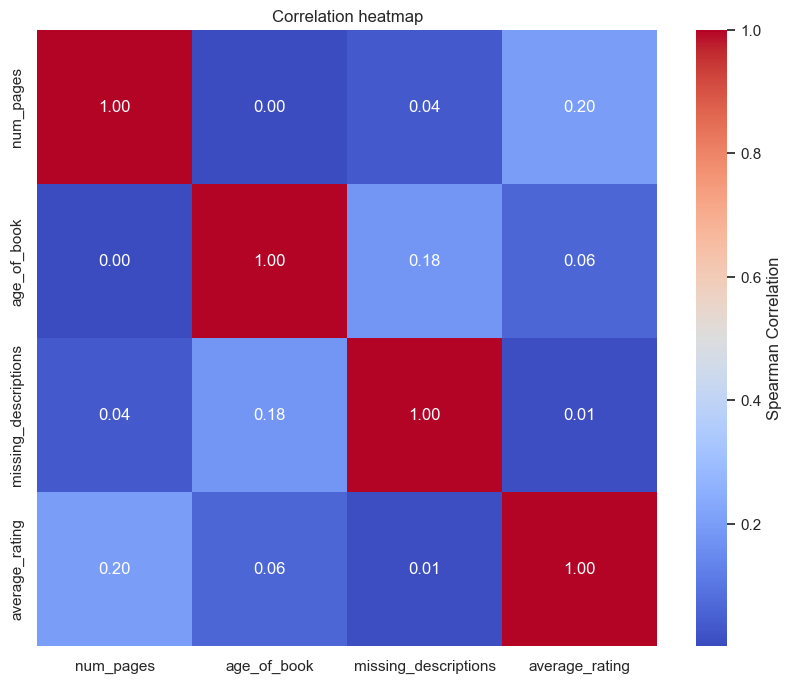

In [4]:
import numpy as np

df["missing_descriptions"] = np.where(df["description"].isna(), 1, 0)
df["age_of_book"] = 2025 - df["published_year"]
column_of_interest = ["num_pages", "age_of_book", "missing_descriptions", "average_rating"]
correlation_matrix = df[column_of_interest].corr(method="pearson")

sns.set_theme(style="white")
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, 
                      fmt=".2f", cmap="coolwarm",
                      cbar_kws={"label": "Spearman Correlation"})
heatmap.set_title("Correlation heatmap")
plt.show()

In [5]:
book_missing = df[~(df["description"].isna()) &
                 ~(df["num_pages"].isna()) &
                 ~(df["published_year"].isna()) &
                 ~(df["average_rating"].isna()) 
                 ]

book_missing


,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_descriptions,age_of_book
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0,0,43.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,0,23.0
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,0,22.0
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,26.0
6808,9789027712059,9027712050,The Berlin Phenomenology,NaN,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,Since the three volume edition ofHegel's Philo...,1981.0,0.00,210.0,0.0,0,44.0


In [6]:
book_missing["categories"].value_counts().reset_index(name='count').sort_values("count", ascending=False)

,index,count
0,Fiction,2523
1,Juvenile Fiction,534
2,Biography & Autobiography,391
3,History,258
4,Literary Criticism,164
...,...,...
280,Butlers,1
279,Gardens,1
278,Assassins,1
277,Married people,1


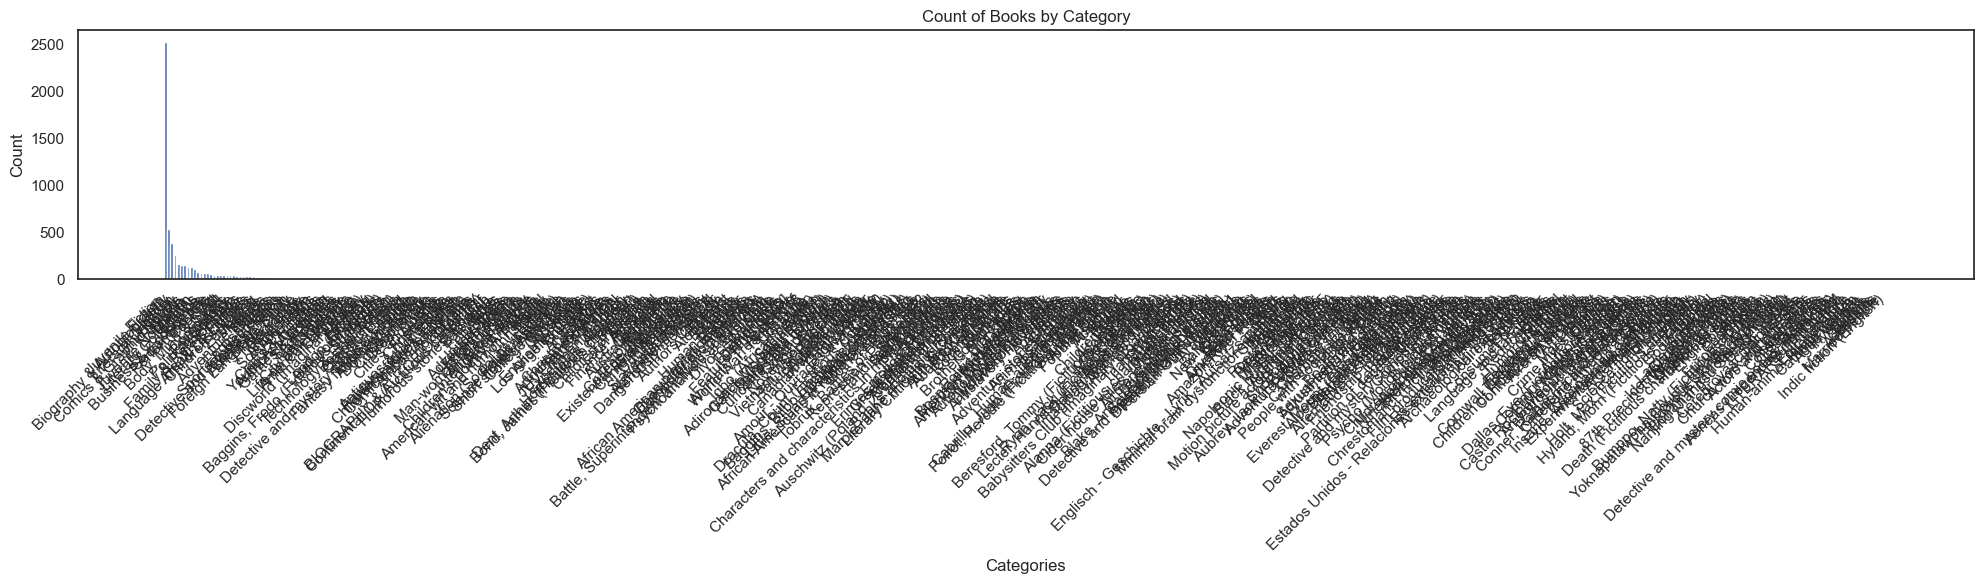

In [9]:
# Get the value counts and sort them
value_counts_df = book_missing["categories"].value_counts().reset_index(name='count').sort_values("count", ascending=False)

# Create the bar chart
plt.figure(figsize=(20, 6))  # Adjust figure size if needed
plt.bar(value_counts_df['index'], value_counts_df['count'])
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Count of Books by Category')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

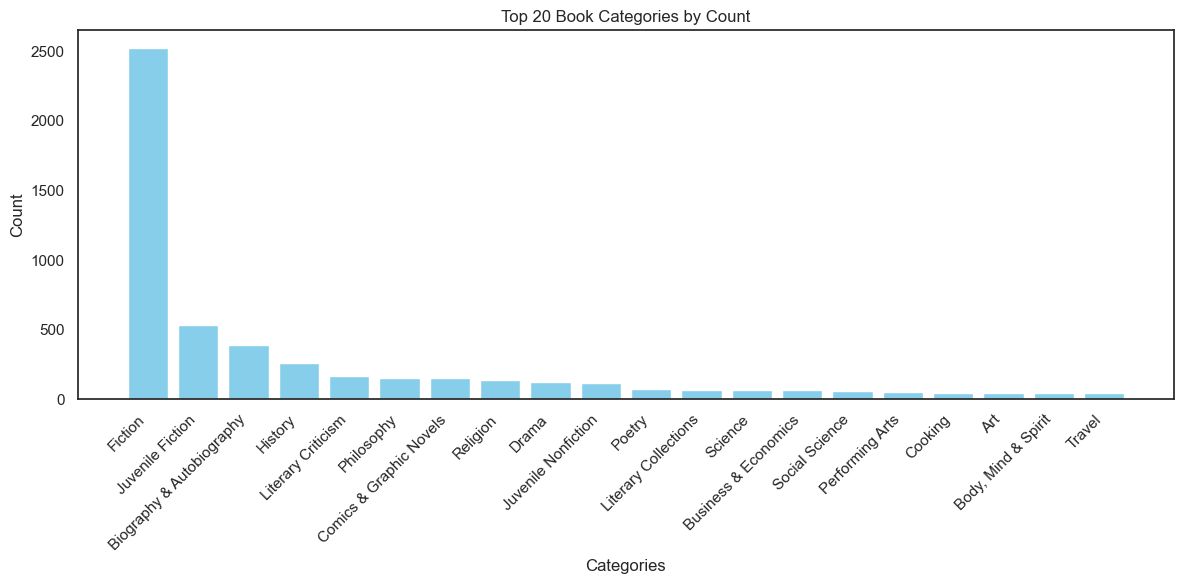

In [10]:
top_20 = (
    book_missing["categories"]
    .value_counts()
    .reset_index(name='count')
    .sort_values("count", ascending=False)
    .head(20)  # Take top 20
)

# Plot
plt.figure(figsize=(12, 6))
plt.bar(top_20['index'], top_20['count'], color='skyblue')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Top 20 Book Categories by Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-labels for readability
plt.tight_layout()  # Prevent label cutoff
plt.show()

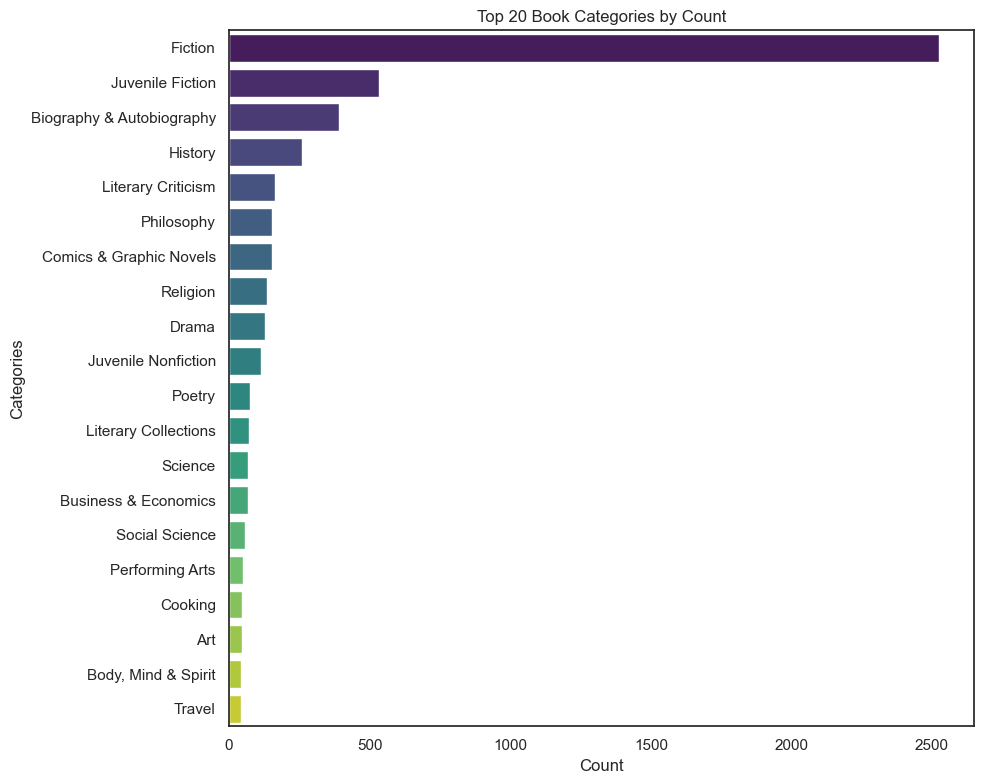

In [12]:
plt.figure(figsize=(10, 8))
sns.barplot(x='count', y='index', data=top_20, palette='viridis')
plt.xlabel('Count')
plt.ylabel('Categories')
plt.title('Top 20 Book Categories by Count')
plt.tight_layout()
plt.show()

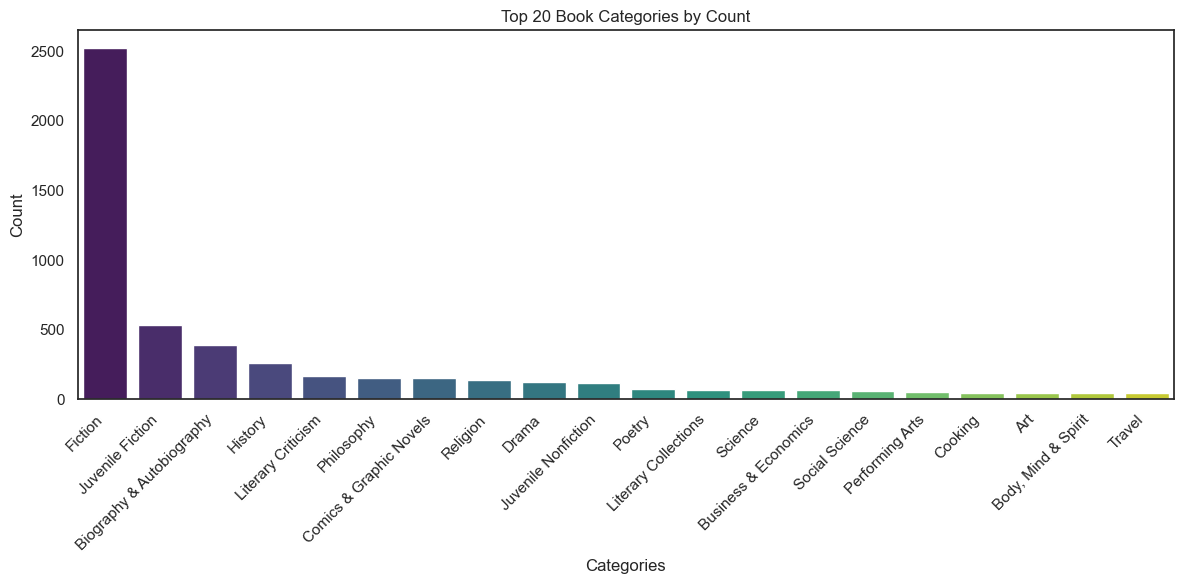

In [14]:
top_20 = (
    book_missing["categories"]
    .value_counts()
    .reset_index(name='count')
    .sort_values("count", ascending=False)
    .head(20)
)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='index', y='count', data=top_20, palette='viridis')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Top 20 Book Categories by Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()